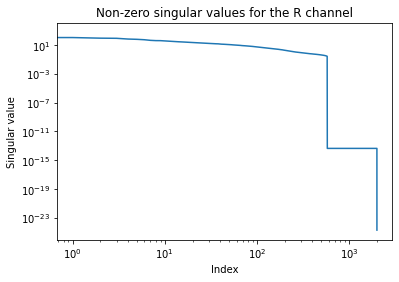

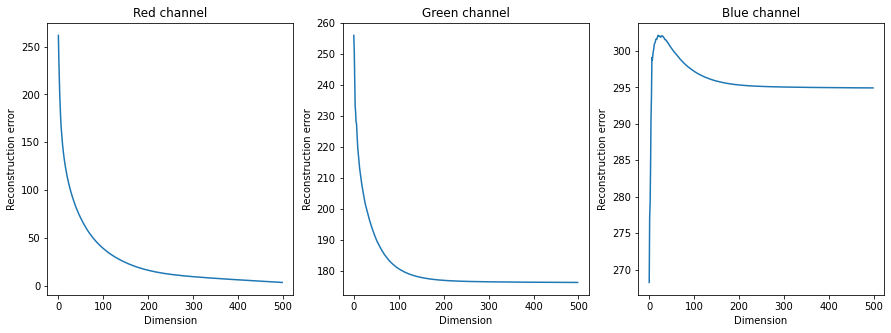

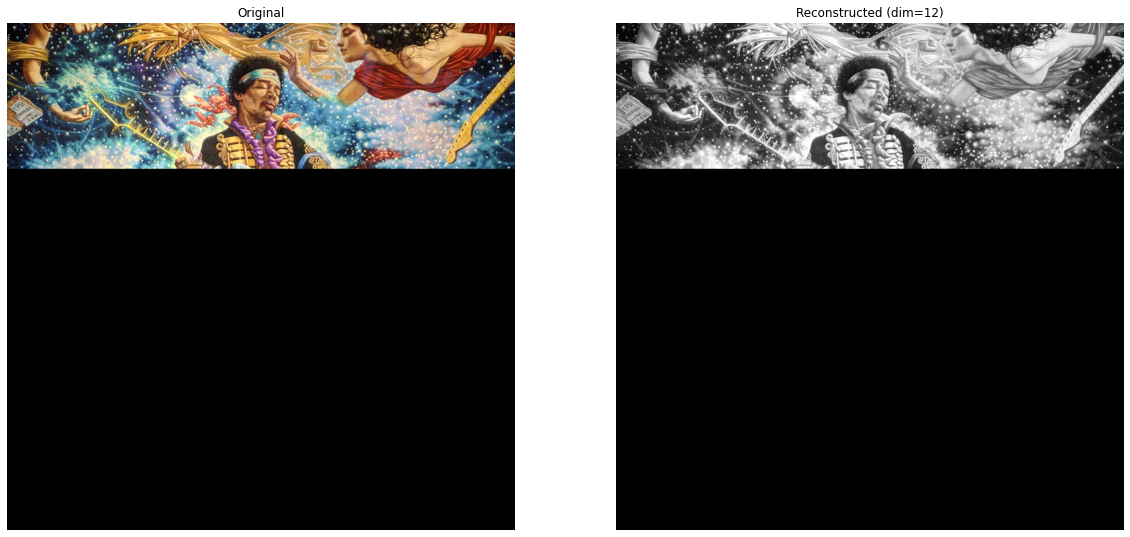

In [39]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = Image.open("hendrix_final.png")

# Extract the R, G, and B channels
r, g, b = img.split()

# Load the image and reduce its size to ease the computational burden
img = img.resize((int(img.width/2), int(img.height/2)))

# Convert each channel to float64
r = np.array(r).astype(np.float64) / 255.0
g = np.array(g).astype(np.float64) / 255.0
b = np.array(b).astype(np.float64) / 255.0

# Compute the SVD of the R channel
q_r, s_r, t_r = np.linalg.svd(r)

# Compute the SVD of the G channel
q_g, s_g, t_g = np.linalg.svd(r)

# Compute the SVD of the B channel
q_b, s_b, t_b = np.linalg.svd(r)

# Compute the reconstruction error matrix for each channel
r_error = np.zeros_like(r)
g_error = np.zeros_like(g)
b_error = np.zeros_like(b)

# Plot the non-zero singular values for the R channel
plt.loglog(s_r[s_r > 0])
plt.title("Non-zero singular values for the R channel")
plt.xlabel("Index")
plt.ylabel("Singular value")
plt.show()

# When plotting the non-zero singular values for the R channel, we can generalize our findings for the G and B channels as well.
# The plot a distribution that has a sharp drop for the singular values after the initial values, which makes sense as the first few singular values capture the majority of the matrix, while the later values progressively get less information.

# The dimensions I would pick (the same number for all three channels) to get the best trade off between reconstruction error and image fidelity (to the original):
# I would compute the percentage of total variance captured by each dimension and then capture at least 95% of it to finally format as the reconstructed image.

# Compute the percentage of total variance captured by each dimension
r_var = np.cumsum(s_r**2) / np.sum(s_r**2)
g_var = np.cumsum(s_g**2) / np.sum(s_g**2)
b_var = np.cumsum(s_b**2) / np.sum(s_b**2)

# Find the number of dimensions that capture at least 95% of the total variance
r_dim = np.argmax(r_var >= 0.95) + 1
g_dim = np.argmax(g_var >= 0.95) + 1
b_dim = np.argmax(b_var >= 0.95) + 1
dim = max(r_dim, g_dim, b_dim)

# Compute the reconstruction error matrix for each channel w.r.t. the dimension
r_err = []
g_err = []
b_err = []
for i in range(1, 100): #Greatest Arbitrary Rank given the computational burden
    r_approx = (q_r[:, :i] @ np.diag(s_r[:i]) @ t_r[:i, :])
    g_approx = (q_g[:, :i] @ np.diag(s_g[:i]) @ t_g[:i, :])
    b_approx = (q_b[:, :i] @ np.diag(s_b[:i]) @ t_b[:i, :])
    r_err.append(np.linalg.norm(r - r_approx, ord="fro"))
    g_err.append(np.linalg.norm(g - g_approx, ord="fro"))
    b_err.append(np.linalg.norm(b - b_approx, ord="fro"))

# Plot the Frobenius norm of the reconstruction error matrix for each channel
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(r_err)
axs[0].set_title("Red channel")
axs[0].set_xlabel("Dimension")
axs[0].set_ylabel("Reconstruction error")
axs[1].plot(g_err)
axs[1].set_title("Green channel")
axs[1].set_xlabel("Dimension")
axs[1].set_ylabel("Reconstruction error")
axs[2].plot(b_err)
axs[2].set_title("Blue channel")
axs[2].set_xlabel("Dimension")
axs[2].set_ylabel("Reconstruction error")
plt.show()

# Combine the approximations into a single RGB image
approx = np.dstack((r_approx, g_approx, b_approx))

# Plot the original and the reconstructed images side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(img)
axs[0].set_title("Original")
axs[0].axis("off")
axs[1].imshow(approx)
axs[1].set_title("Reconstructed (dim={})".format(dim))
axs[1].axis("off")
plt.show()